In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/portuguese-bank-marketing-data-set/bank_cleaned.csv
/kaggle/input/portuguese-bank-marketing-data-set/bank-full.csv


<h1> libraryies

In [177]:
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE

In [27]:
data=pd.read_csv('/kaggle/input/portuguese-bank-marketing-data-set/bank-full.csv',sep = ';')
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [28]:
data.tail (10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
data.shape


(45211, 17)

In [15]:
data.columns
data 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [34]:
data.describe().style.background_gradient()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<h2>Deal with missing data****

there is data is  recorded other and unknown such as in **poutcome**

In [22]:
# solve missing value other 
cond1=data.poutcome=='other'
df=data.drop(data[cond1].index,axis=0,inplace=False)
#relpalse unknownunknown with other in 'job','education'

df[['job','education']] = df[['job','education']].replace(['unknown'],'other')


In [29]:
df[['balance']].mean()
df['balance_outliers'] = df['balance']
df['balance_outliers']= zscore(df['balance_outliers']) # i used this to fiend distrpution of data  anf x-score  is used for  measures the number of standard deviations a data point
cond2 = (df['balance_outliers']>3) | (df['balance_outliers']<-3 ) #This creates a boolean Series indicating whether each value in the 'balance_outliers' column is greater than 3 and the anther one used for opposite
new_data = df.drop(df[cond2].index, axis = 0, inplace = False)

In [30]:
data_f=new_data.drop('balance_outliers', axis=1)

<h2>Creating and transforming data

In [33]:
# Step 1: Change column name: 'y' to 'response'  and it convert yes to 1 and  no to 0
data_f.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(data_f, new_column, old_column):
    data_f[new_column] = data_f[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return data_f[new_column].value_counts()

convert(data_f, "response_binary", "response")

response_binary
0    37785
1     4870
Name: count, dtype: int64

In [35]:
# Step 2: Drop column "contact" which is useless
ddf = data_f.drop('contact', axis=1)

In [37]:
# Step 3: Change the unit of 'duration' from seconds to minutes
ddf['duration'] = ddf['duration'].apply(lambda n:n/60).round(2)

In [45]:
#Make encoder for month to make jan =1 ,feb=2 and so on 
label_encoder=LabelEncoder()
sorted_months = sorted(ddf['month'].unique())  # sorted  the mounth
label_encoder.fit(sorted_months)
ddf['month_int'] = label_encoder.transform(ddf['month']) + 1   # Adding 1 to begin from one not zero



<h2>Filttring Data

In [47]:
# Step 1: Drop rows that 'duration' < 5s
condition3 = (ddf['duration']<5/60)
d_ff = ddf.drop(ddf[condition3].index, axis = 0, inplace = False)

In [49]:
# Step 2: Drop customer values with 'other' education
condition4 = (d_ff['education'] == 'other')
final_data = d_ff.drop(d_ff[condition4].index, axis = 0, inplace = False)

<h1>Data Visualization

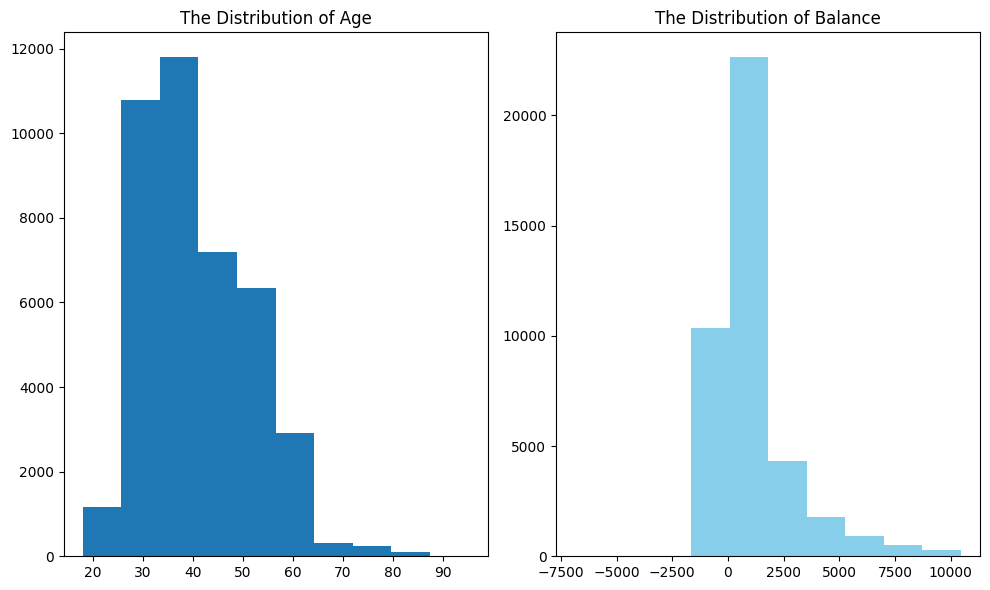

In [63]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(final_data['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(final_data['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

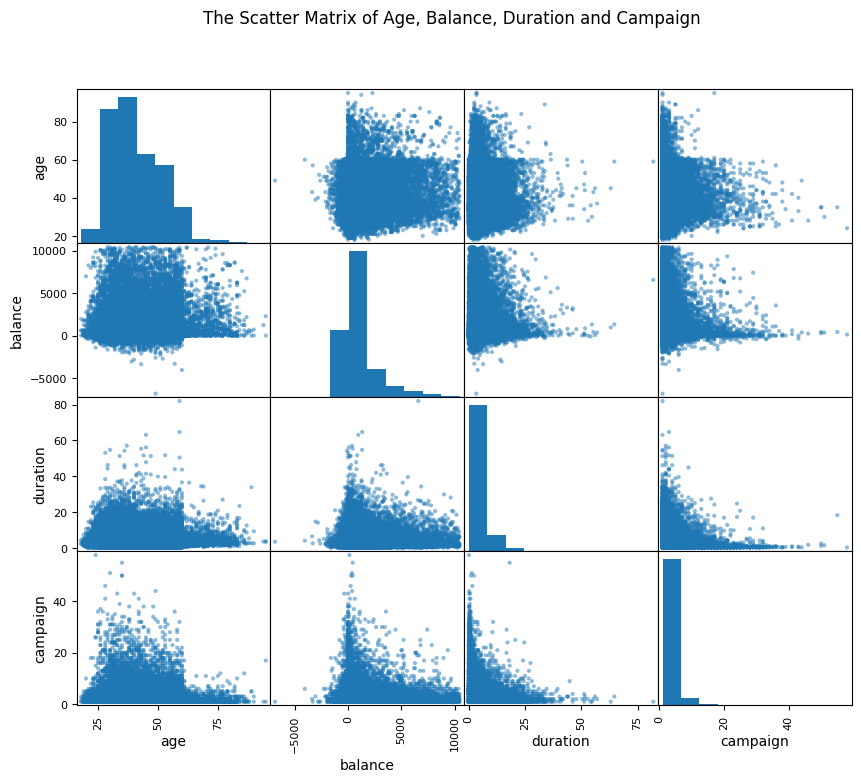

In [64]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(final_data[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

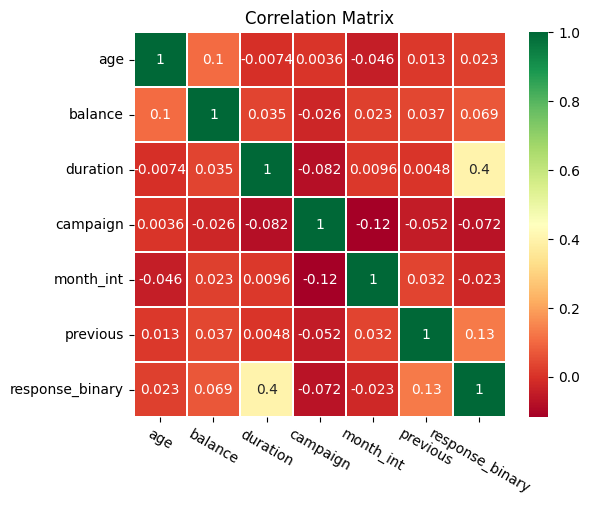

In [67]:
corr_data = final_data[['age','balance','duration','campaign','month_int','previous','response_binary']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [69]:
lst = [final_data]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

In [71]:
age_balance1 = pd.DataFrame(final_data.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(final_data.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()

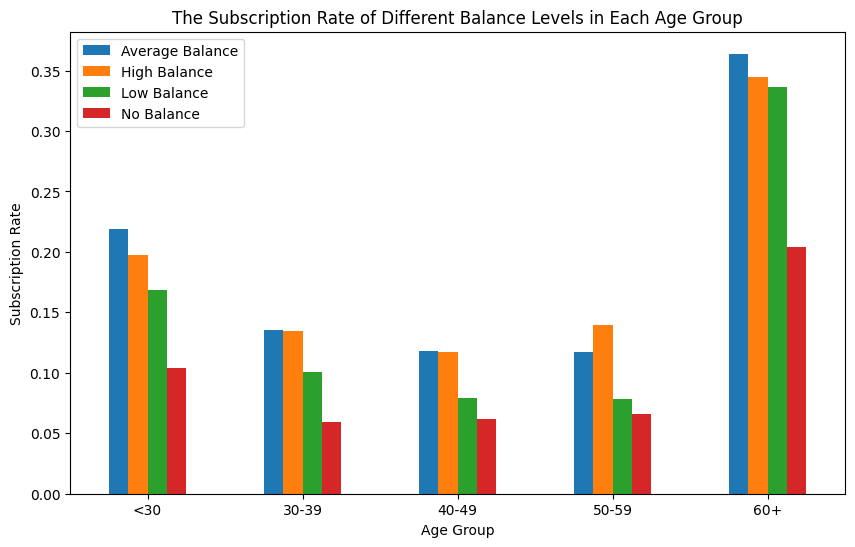

In [86]:
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

<h2>Prepare Data for Classification

In [100]:
final_data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,response,response_binary,month_int,age_group,balance_group
0,58,management,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,no,0,9,50.0,average balance
1,44,technician,secondary,no,29,yes,no,5,may,2.52,1,-1,0,no,0,9,40.0,low balance
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,no,0,9,30.0,low balance
5,35,management,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,no,0,9,30.0,low balance
6,28,management,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,no,0,9,20.0,low balance


In [145]:
linkname = '/kaggle/input/portuguese-bank-marketing-data-set/bank_cleaned.csv'
dataset = pd.read_csv(linkname)
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [146]:
# View the first 5 rows of cleaned data
dataset.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [147]:
datase t.drop(['marital'],axis=1, inplace=True)
dataset1 = dataset.iloc[:, 0:7]

In [169]:
dataset2 = pd.get_dummies(dataset1, columns = ['job'])
dataset2 = pd.get_dummies(dataset2, columns = ['education'])
dataset2['housing'] = dataset2['housing'].map({'yes': 1, 'no': 0})
dataset2['default'] = dataset2['default'].map({'yes': 1, 'no': 0})
dataset2['loan'] = dataset2['loan'].map({'yes': 1, 'no': 0})
dataset_response = pd.DataFrame(dataset['response_binary'])
dataset2 = pd.merge(dataset2, dataset_response, left_index = True, right_index = True)
#modified by changing dataset into pandas format
X=dataset2.drop(['response_binary'],axis=1)
Y=dataset2['response_binary']
print(X.columns)
print(Y.shape)

Index(['age', 'default', 'balance', 'housing', 'loan', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_other', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'education_primary', 'education_secondary', 'education_tertiary'],
      dtype='object')
(40841,)


<h3>5.3 Feature selection

(40841, 20)
(40841,)


<h3>Train/ test split

In [171]:
# 20% of the data will be used for testing
test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=42)
print(Y_train.shape)
print(X_train.shape)

(32672,)
(32672, 20)


<h2>classification algorithms

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [175]:
model=LogisticRegression()

model.fit(X_train,Y_train)

LogisticRegression()

In [178]:
import xgboost as xgb
model = []
model.append(('LR', LogisticRegression(solver='liblinear')))
model.append(('KNN', KNeighborsClassifier()))
model.append(('CART', DecisionTreeClassifier()))
model.append(('NB', GaussianNB()))
model.append(('XG', xgb.XGBClassifier()))

model_name=[]
i=0
from sklearn.model_selection import cross_validate, KFold
prediction=list()
kf = KFold(n_splits=5, shuffle= True)
Xk,Yk = X.to_numpy(), Y.to_numpy()
trn_tst_ind=list()
for train_index, test_index in kf.split(Xk):
    trn_tst_ind.append((train_index, test_index))
    X_res, X_test = Xk[train_index], Xk[test_index]
    Y_res, Y_test = Yk[train_index], Yk[test_index]    
    sm = SMOTE(random_state=42)
    X_res, Y_res = sm.fit_resample(X_res, Y_res)
    predict=np.empty([X_test.shape[0],len(model)])
    i=0
    for name,mod in model:
        predict[:,i]=mod.fit(X_res, Y_res).predict(X_test)
        model_name.append(name)
        i+=1
    prediction.append(predict)    

In [179]:
from sklearn.metrics import classification_report
for page in range(5):
    print(f'page: {page}')
    predict=prediction[page]
    test_index = trn_tst_ind[page][1]
    for ind in range(len(model)):
        print(f'model name:{model_name[ind]}: accuracy:{accuracy_score(Yk[test_index], predict[:,ind]):.2f}')
        print(classification_report(Yk[test_index], predict[:,ind]))        
    predict_maj = np.zeros((len(Yk[test_index]),))
    predict_maj[np.sum(predict,axis=1)>2]=1
    print(f'majority vote classifier')
    print(classification_report(Yk[test_index], predict_maj))

page: 0
model name:LR: accuracy:0.64
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      7252
           1       0.17      0.59      0.27       917

    accuracy                           0.64      8169
   macro avg       0.55      0.62      0.51      8169
weighted avg       0.84      0.64      0.71      8169

model name:KNN: accuracy:0.67
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      7252
           1       0.17      0.52      0.26       917

    accuracy                           0.67      8169
   macro avg       0.55      0.60      0.52      8169
weighted avg       0.83      0.67      0.73      8169

model name:CART: accuracy:0.83
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7252
           1       0.28      0.31      0.29       917

    accuracy                           0.83      8169
   macro avg       0.59      0

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [182]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10,shuffle=True ,random_state=seed)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.888712 (0.005867)
KNN: 0.878092 (0.004596)
CART: 0.835578 (0.005642)
NB: 0.825325 (0.009388)


In [188]:
LR = LogisticRegression(max_iter=100,)
LR.fit(X_train, Y_train)

LogisticRegression()

In [190]:
predictions = LR.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [191]:
print(accuracy_score(Y_test, predictions))

0.8822233104799216


[[7206    0]
 [ 962    0]]


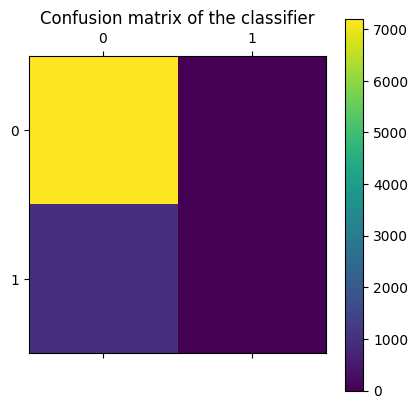

In [192]:
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()